In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
      

class AutoEncoder(nn.Module):
    '''
    A class representing a fully-connect AutoEncoder.
    '''
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
                nn.Linear(784, 16),
                nn.ReLU(),
                nn.BatchNorm1d(16),
                nn.Linear(16, 16),
                nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
                nn.BatchNorm1d(16),
                nn.Linear(16, 784),
                nn.Sigmoid()
            )
                

    def forward(self, x):
        self.encoded = self.encoder(x)
        self.decoded = self.decoder(self.encoded)
        
        return self.decoded

In [54]:
# Read the data in
data = pd.read_csv('./data/mnist_train.csv')

# Extract the X and y training data and normalise.
X_train = data[data.columns[1:]].as_matrix()/255
y_train = data['5'].as_matrix()

# Convert into PyTorch tensors.
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)

# Define the batch size and number of epochs.
batch_size = 64
epochs = 10

# Create data loader.
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_data_loader = DataLoader(train_data, batch_size)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [55]:
# Instantiate AutoEncoder
ae = AutoEncoder()

# Instantiate Loss
criterion = nn.BCELoss()

# Instantiate Adam Optimiser
optimizer = torch.optim.Adam(ae.parameters())

Epoch 0: loss = 0.195512
Epoch 1: loss = 0.185272
Epoch 2: loss = 0.184282
Epoch 3: loss = 0.183958
Epoch 4: loss = 0.183654
Epoch 5: loss = 0.183396
Epoch 6: loss = 0.183160
Epoch 7: loss = 0.182903
Epoch 8: loss = 0.182619
Epoch 9: loss = 0.182344


<IPython.core.display.Javascript object>


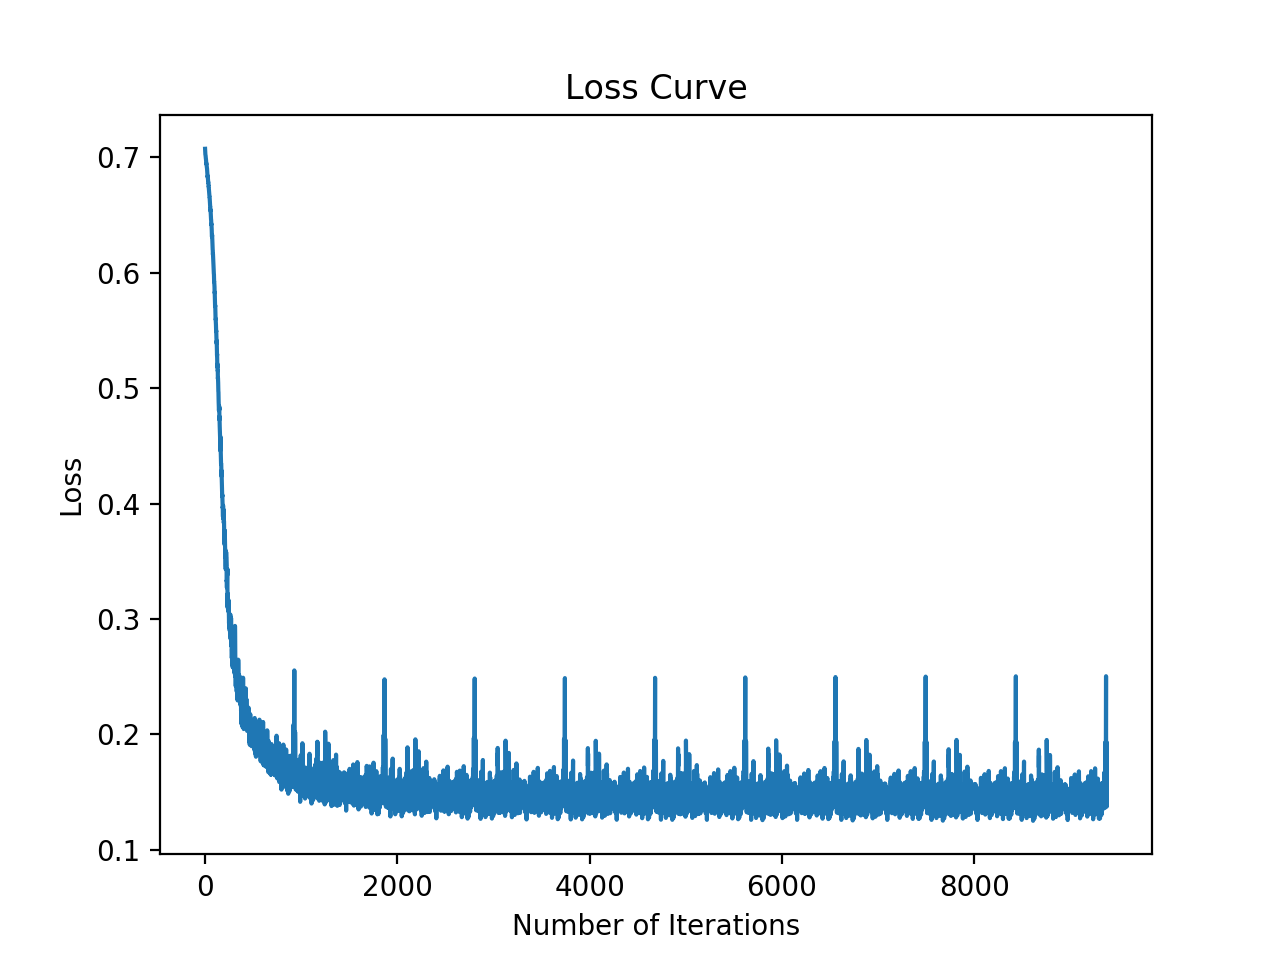

Text(0,0.5,'Loss')

In [56]:
%matplotlib notebook
losses = []

# For each epoch
for epoch in range(epochs):
    
    # For each batch in the data loader
    for features, labels in train_data_loader:
        # Flatten the features
        flatten_features = features.view(features.size(0), -1)
        
        # Pass through the AutoEncoder
        output = ae(flatten_features)

        # Reset optimiser gradients
        optimizer.zero_grad()
        
        # Calculate loss between AE output and input
        loss = criterion(output, flatten_features)
        
        # Calculate gradients
        loss.backward()
        
        # Update Parameters
        optimizer.step()
        
        losses.append(loss)
    
    print('Epoch %d: loss = %f' % (epoch, loss))
    
plt.plot(range(len(losses)), losses)
plt.title('Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')

<IPython.core.display.Javascript object>


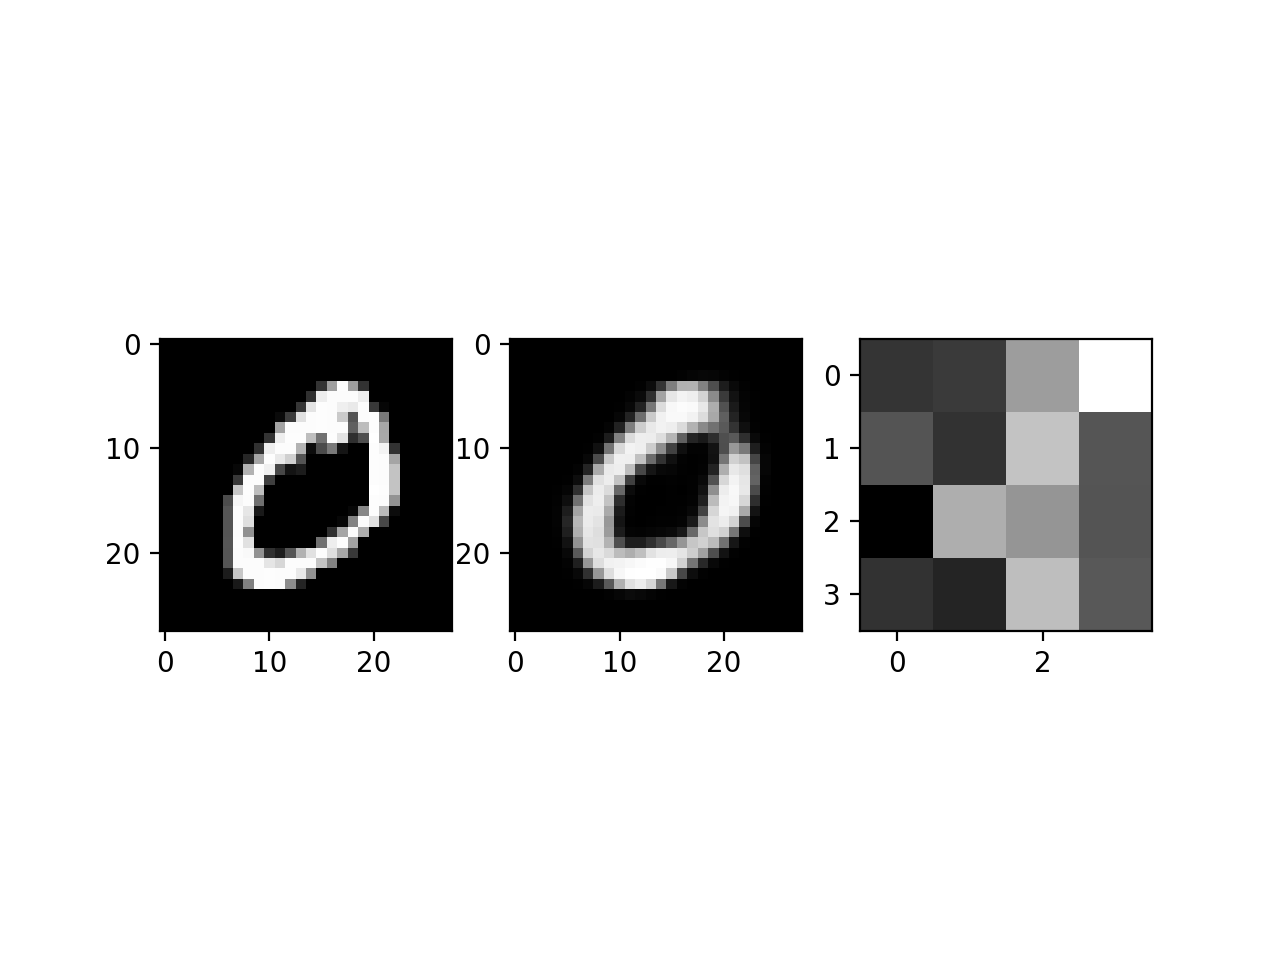

<IPython.core.display.Javascript object>


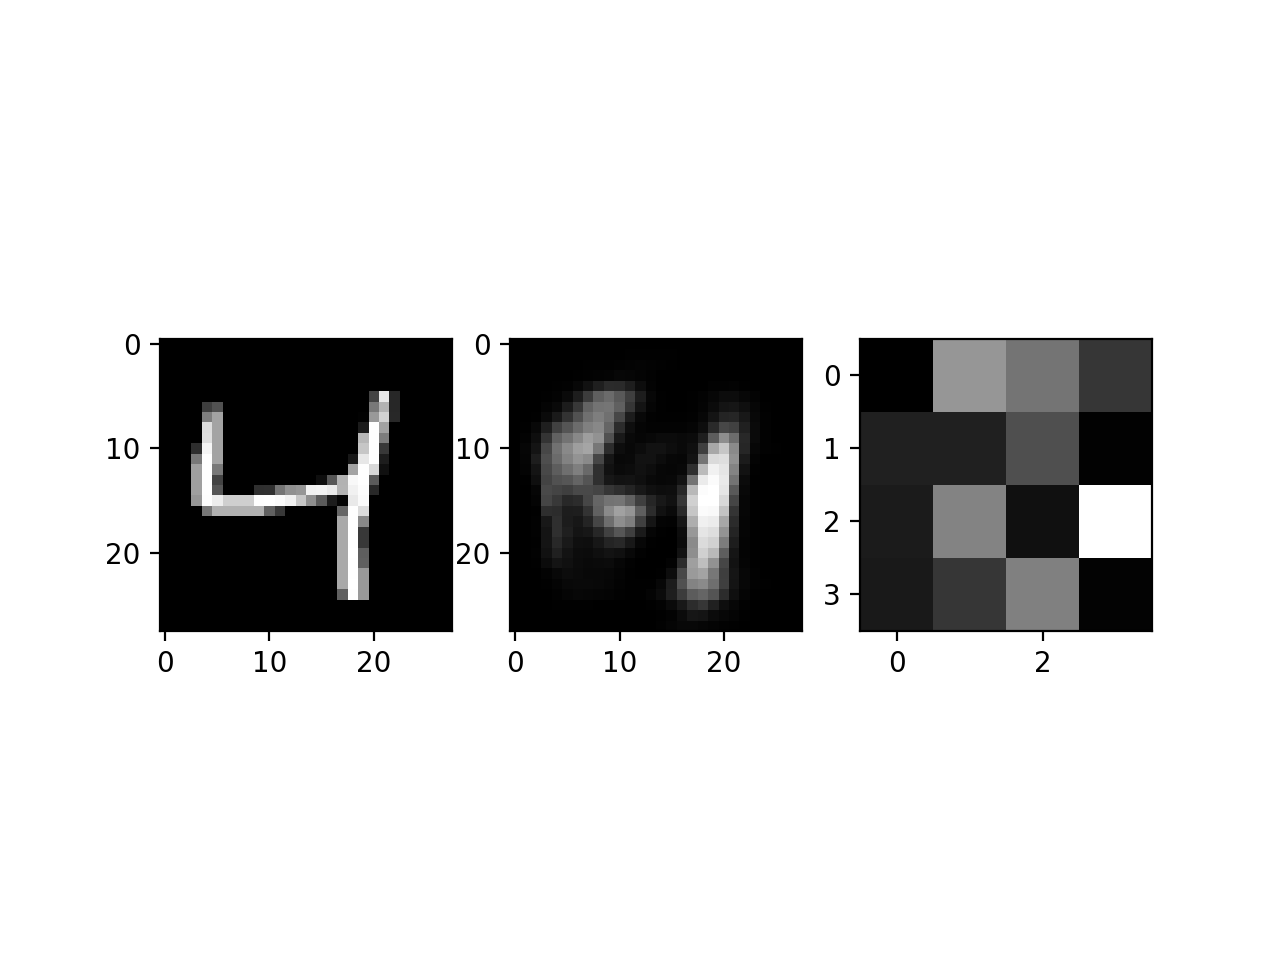

<IPython.core.display.Javascript object>


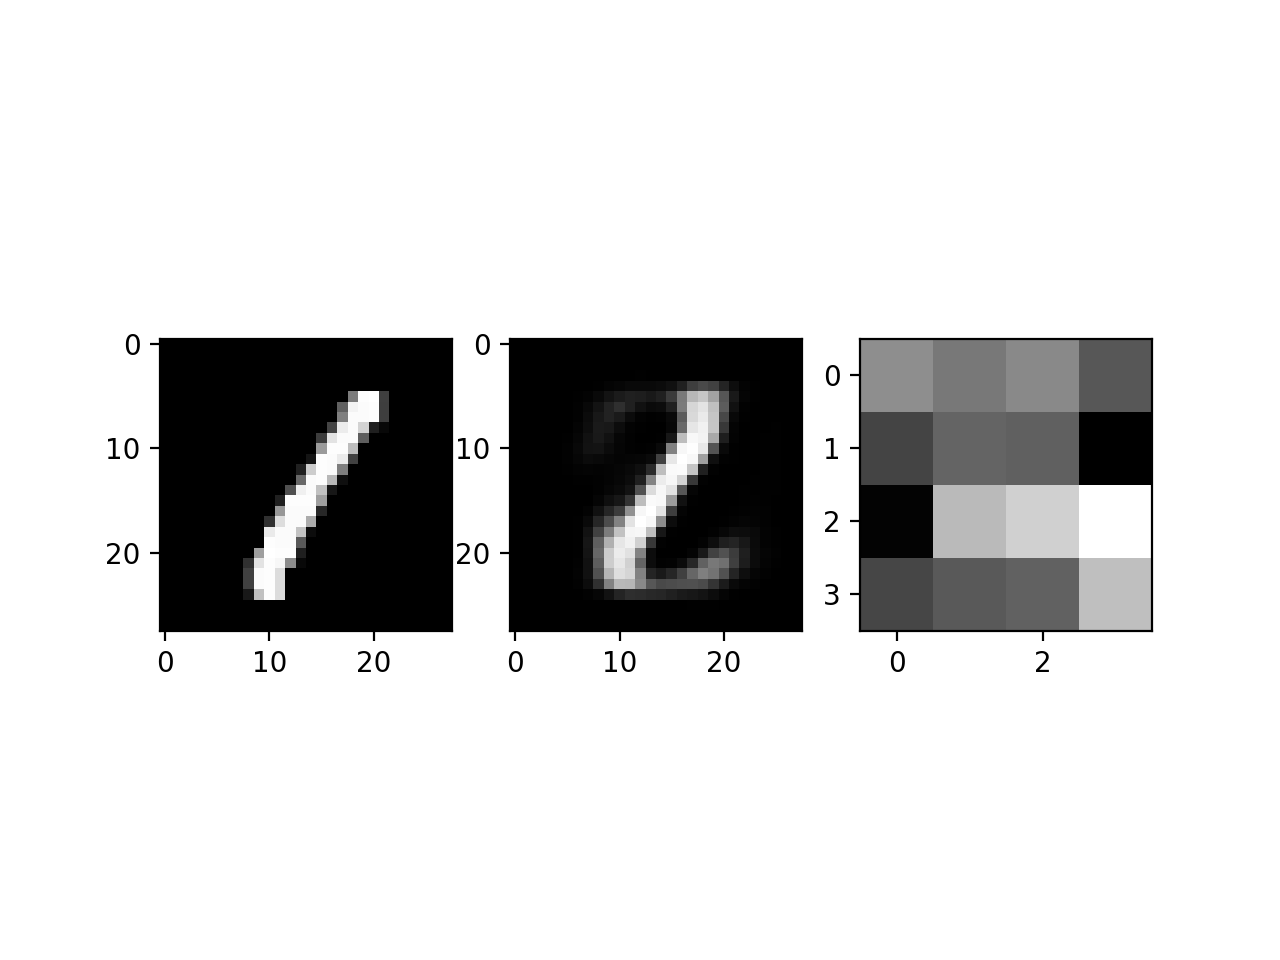

<IPython.core.display.Javascript object>


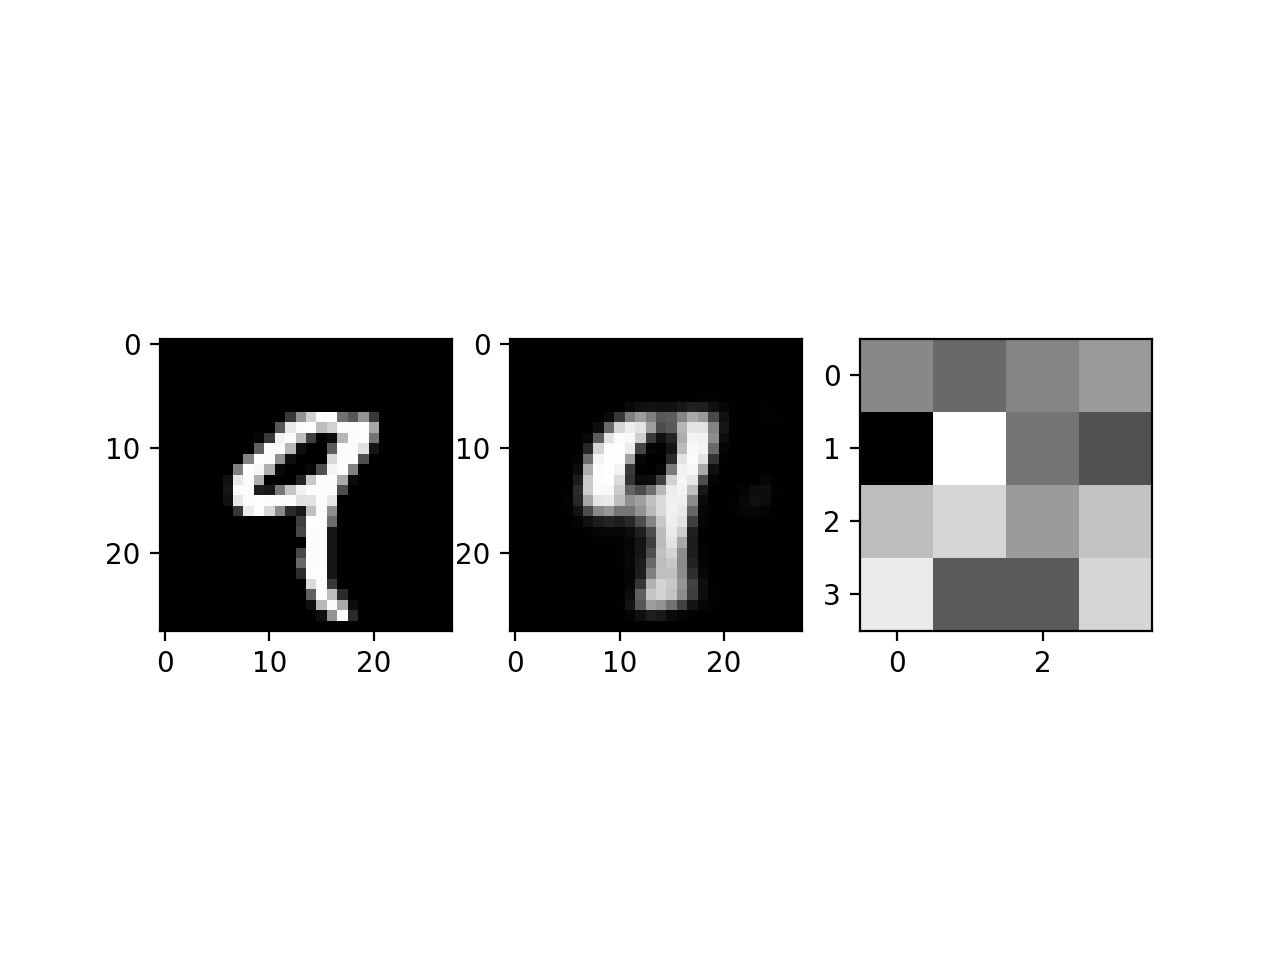

<IPython.core.display.Javascript object>


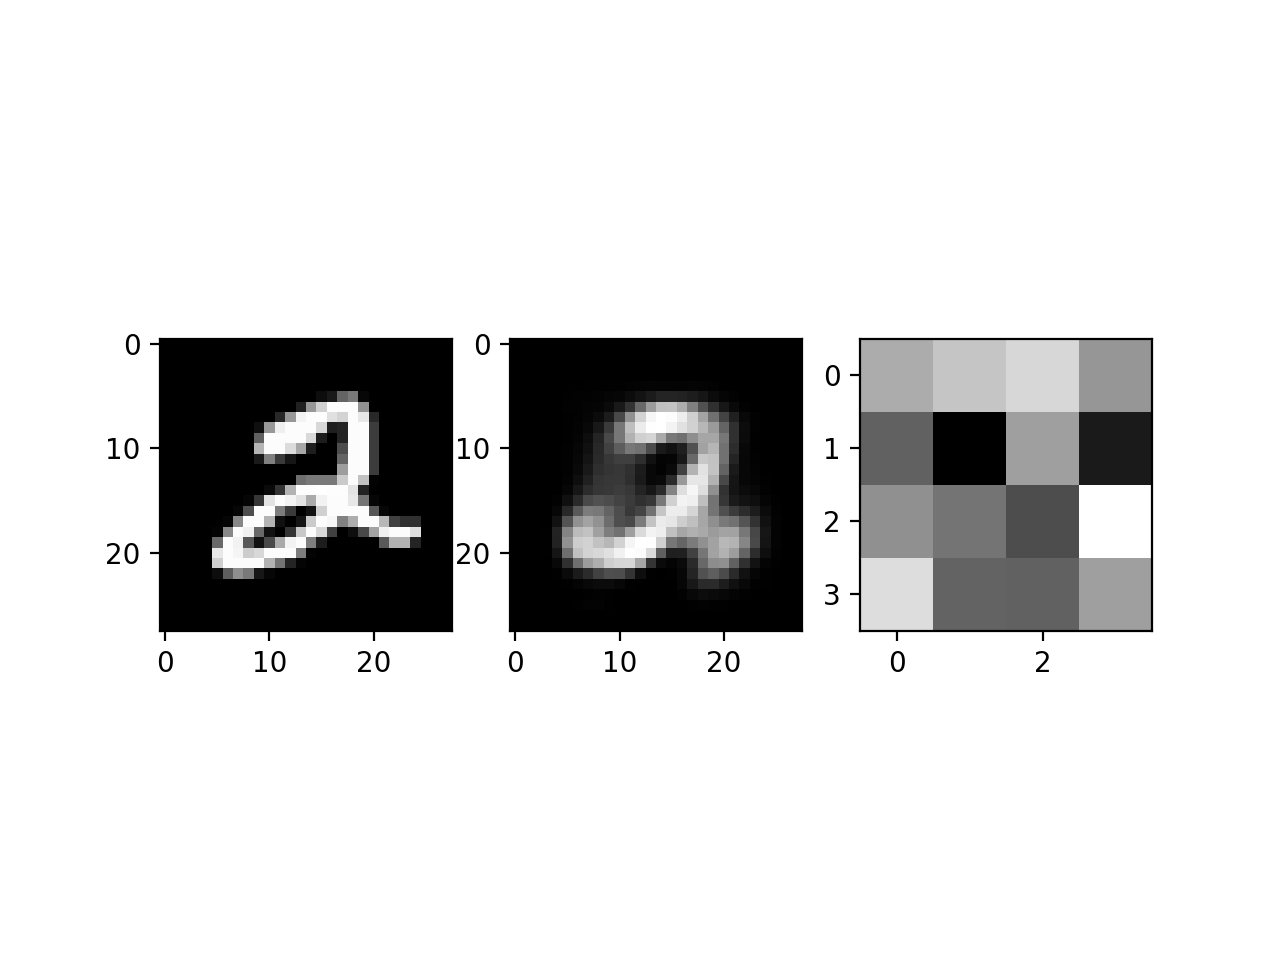

<IPython.core.display.Javascript object>


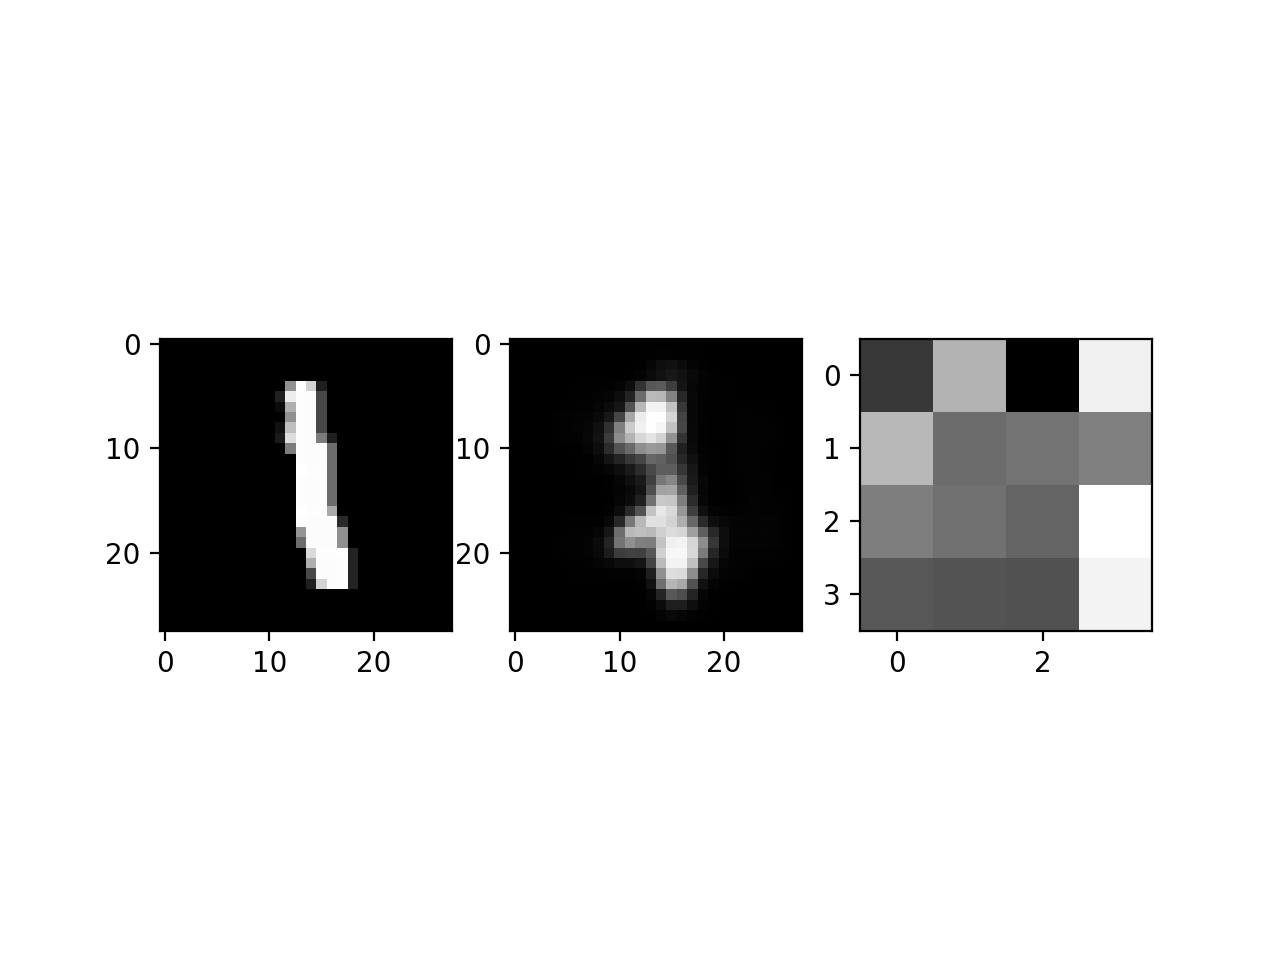

<IPython.core.display.Javascript object>


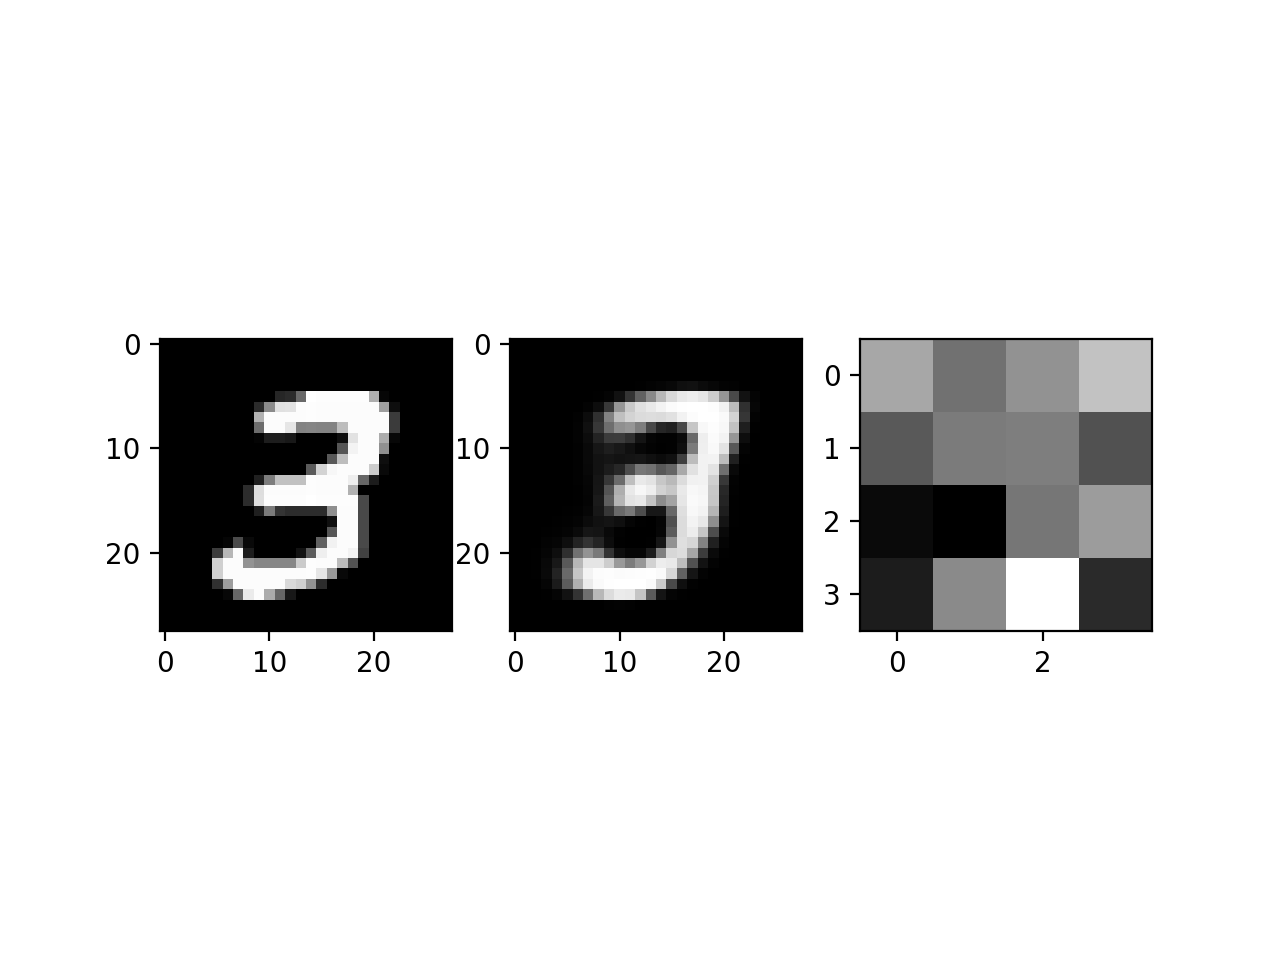

<IPython.core.display.Javascript object>


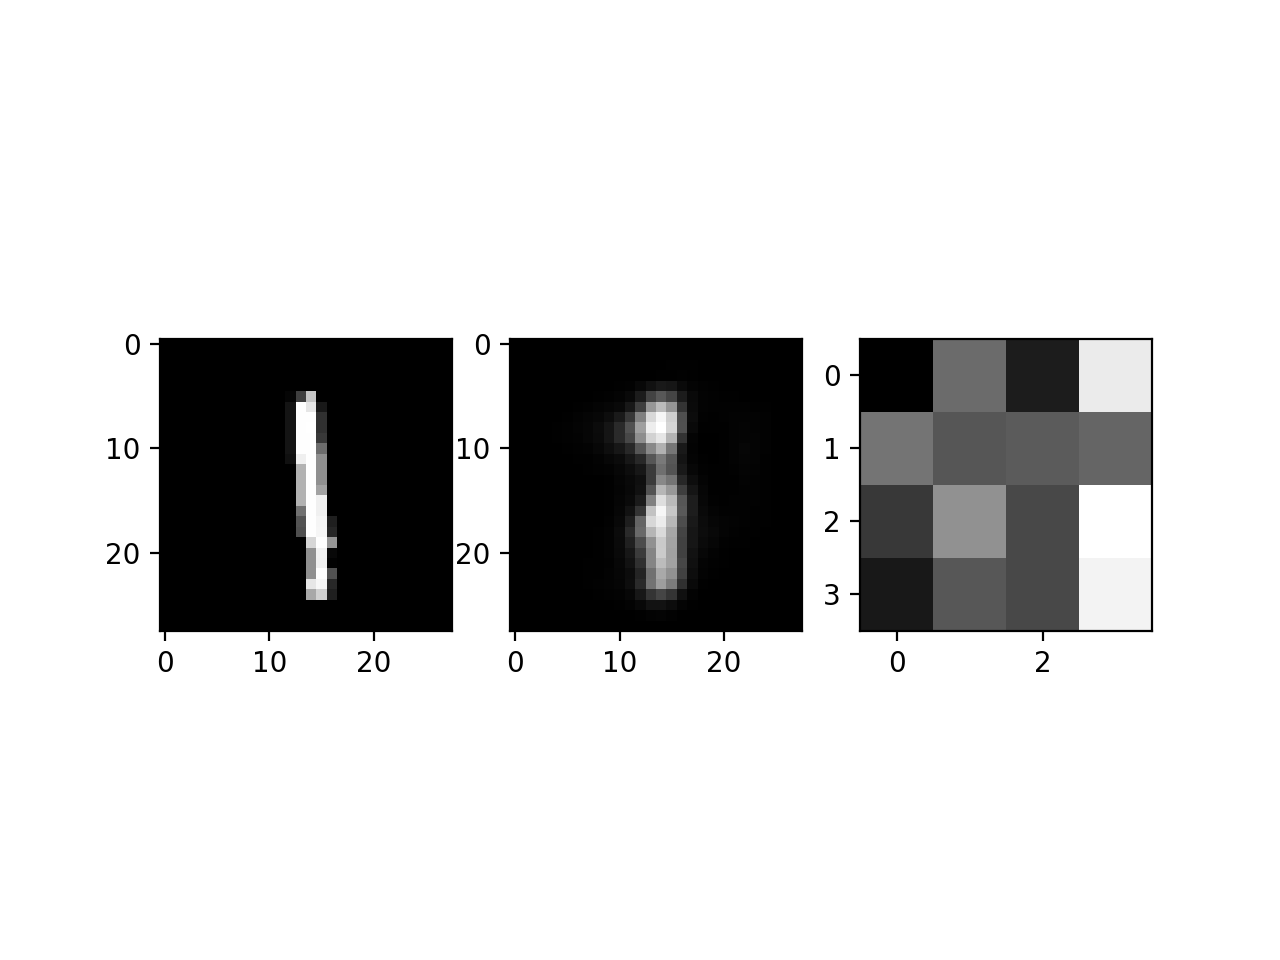

<IPython.core.display.Javascript object>


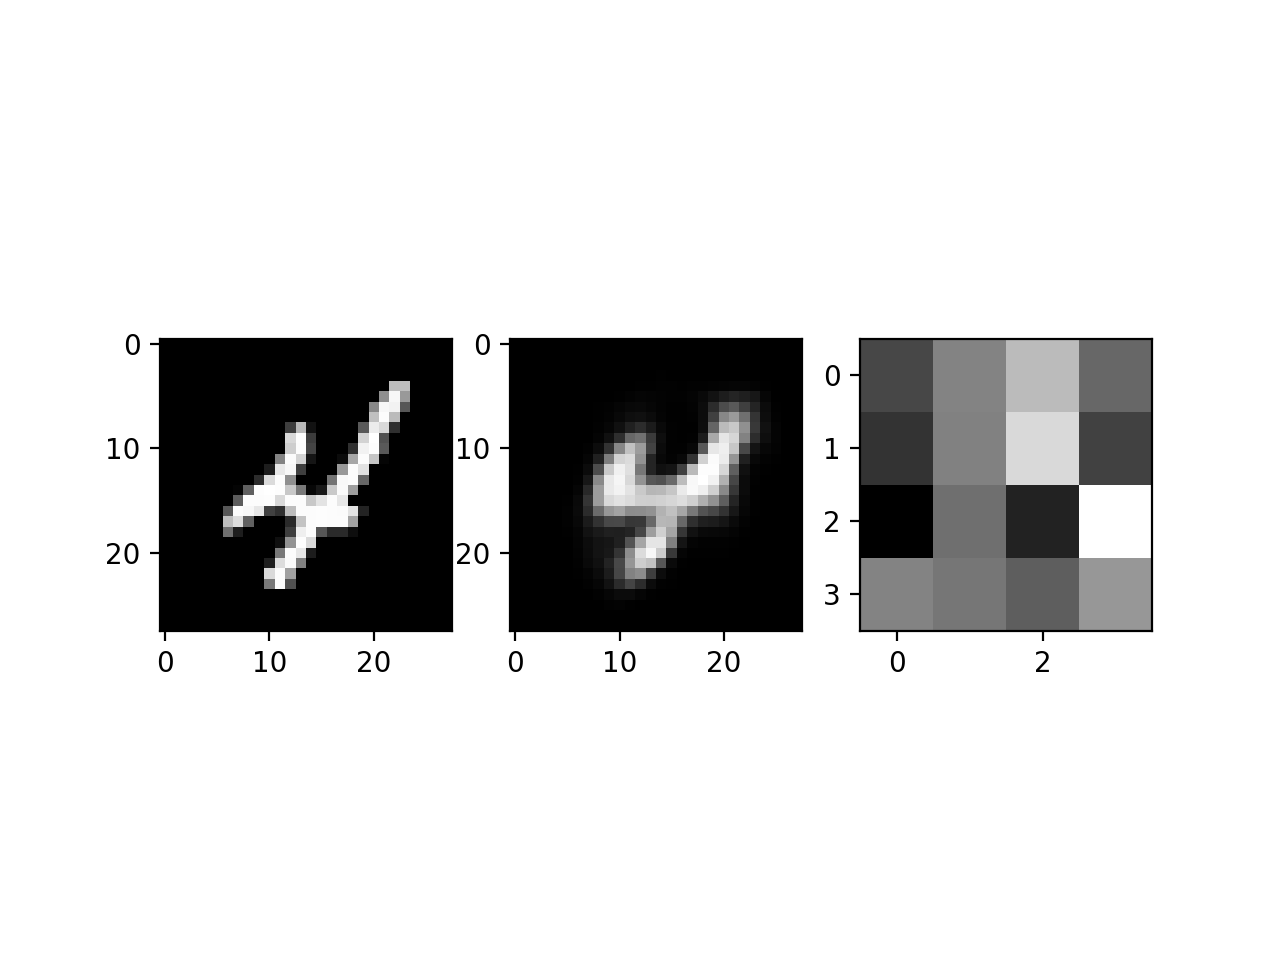

<IPython.core.display.Javascript object>


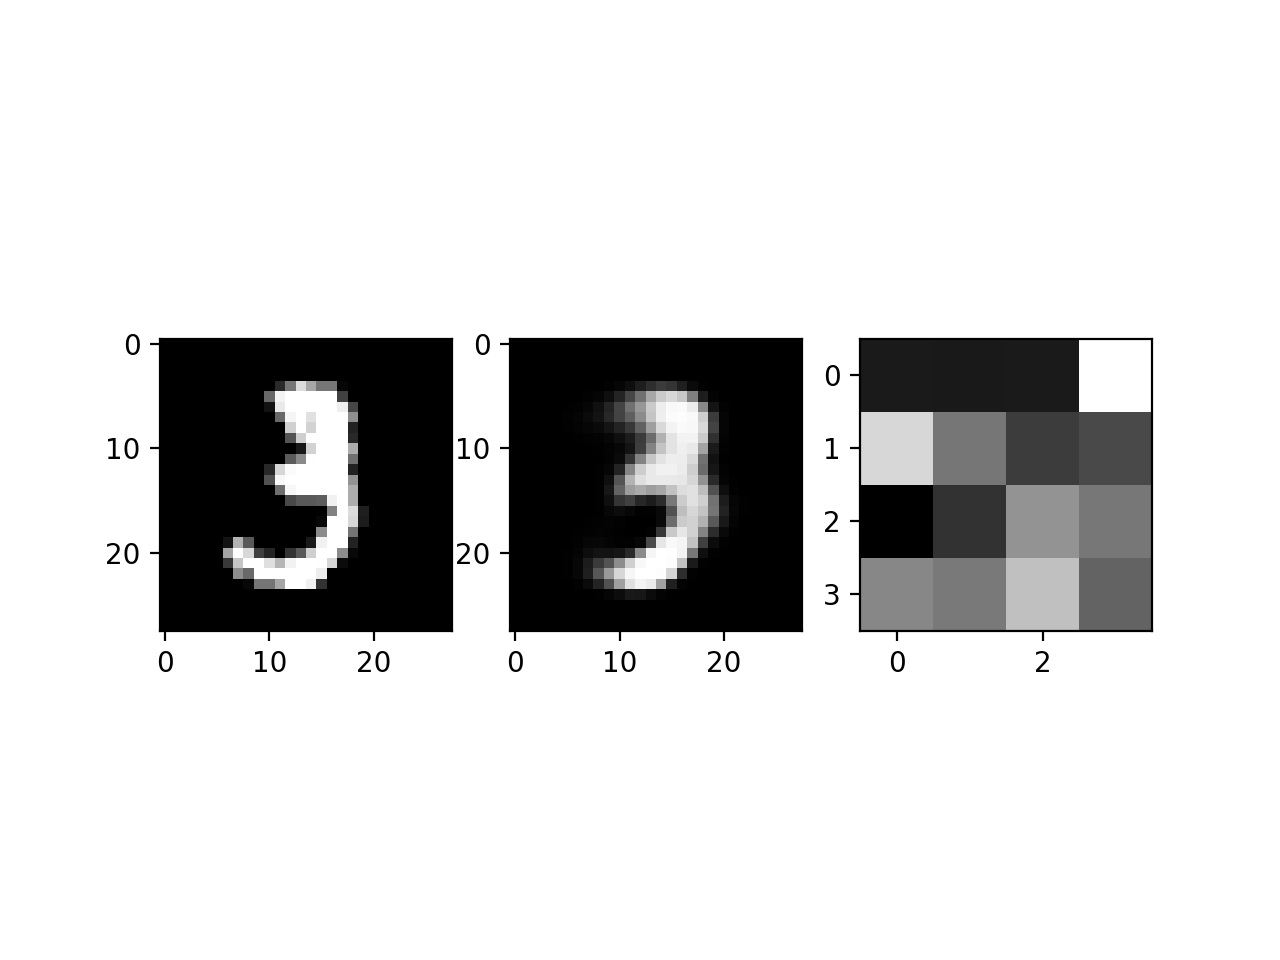

In [57]:
# Extract ten examples
examples = X_train_tensor[:10]

# Flatten the ten examples
examples_flatten = examples.view(examples.size(0), -1)

# Pass them through the trained AE.
predictions = ae(examples_flatten)

# Extract their encodings
encodings = ae.encoded

encodings = encodings.view(-1, 4, 4)
predictions = predictions.view(-1, 28, 28)

# Display Image, Reconstruction, and Encoding
for i in range(10):
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(examples[i].view(28, 28), cmap='gray')
    ax[1].imshow(predictions[i].detach().numpy(), cmap='gray')
    ax[2].imshow(encodings[i].detach().numpy(), cmap='gray')
    plt.show()


In [110]:
class ConvolutionalAutoEncoder(nn.Module):
    '''
    A class that represents a Convolutional AutoEncoder
    '''
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
                nn.Conv2d(1, 16, kernel_size=3, stride=1),
                nn.ReLU(),
                nn.BatchNorm2d(16),
        )
        
        self.decoder = nn.Sequential(
                nn.ConvTranspose2d(16, 1, kernel_size=3, stride=1),
                nn.Sigmoid(),
            )
                

    def forward(self, x):
        self.encoded = self.encoder(x)
        self.decoded = self.decoder(self.encoded)
        
        return self.decoded

Epoch 0: loss = 0.105177
Epoch 1: loss = 0.101278
Epoch 2: loss = 0.101280
Epoch 3: loss = 0.101058
Epoch 4: loss = 0.101185


<IPython.core.display.Javascript object>


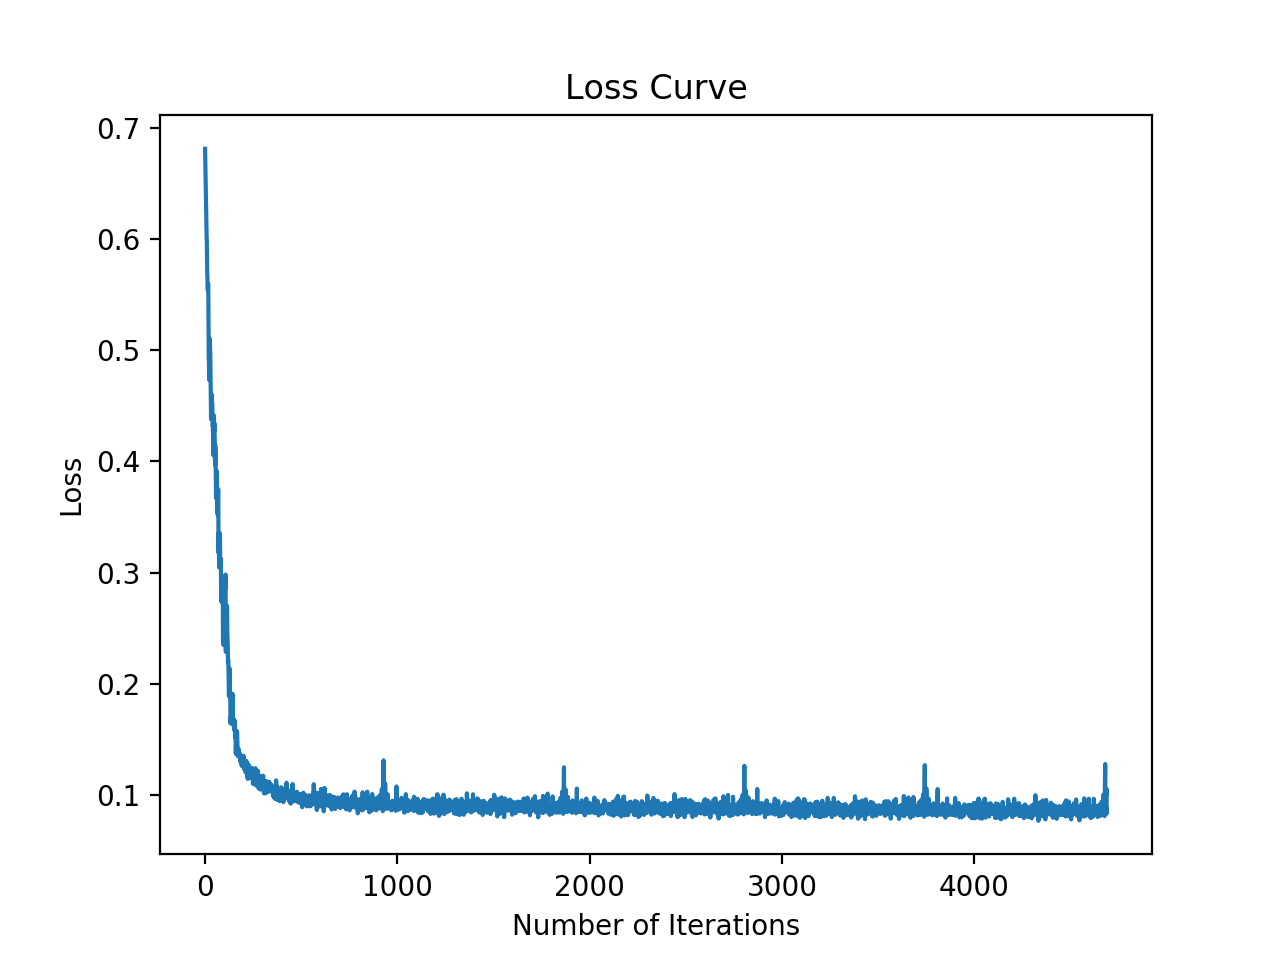

Text(0,0.5,'Loss')

In [163]:
%matplotlib notebook
losses = []

# Instantiate CAE
ae = ConvolutionalAutoEncoder()

# Instantiate Loss
criterion = nn.BCELoss()

# Instantiate Adam Optimiser
optimizer = torch.optim.Adam(ae.parameters())

# For each epoch
for epoch in range(5):
    
    # For each batch
    for features, labels in train_data_loader:
        # Reshape into an image that can be passed through a CNN.
        features = features.view(features.size(0), 1, 28, 28)
        
        # Generate Gaussian noise
        noise = torch.tensor(np.random.randn(features.size(0), 784)).view(-1, 1, 28, 28).type(torch.FloatTensor)
        
        # Distort the images
        features_noise = features + noise * 0.3
        
        # Pass through the CAE
        output = ae(features_noise)

        # Reset optimiser gradients
        optimizer.zero_grad()
        
        # Calculate loss between the noisy images and original images
        loss = criterion(output, features)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        losses.append(loss)
    
    print('Epoch %d: loss = %f' % (epoch, loss))
    
plt.plot(range(len(losses)), losses)
plt.title('Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

<IPython.core.display.Javascript object>


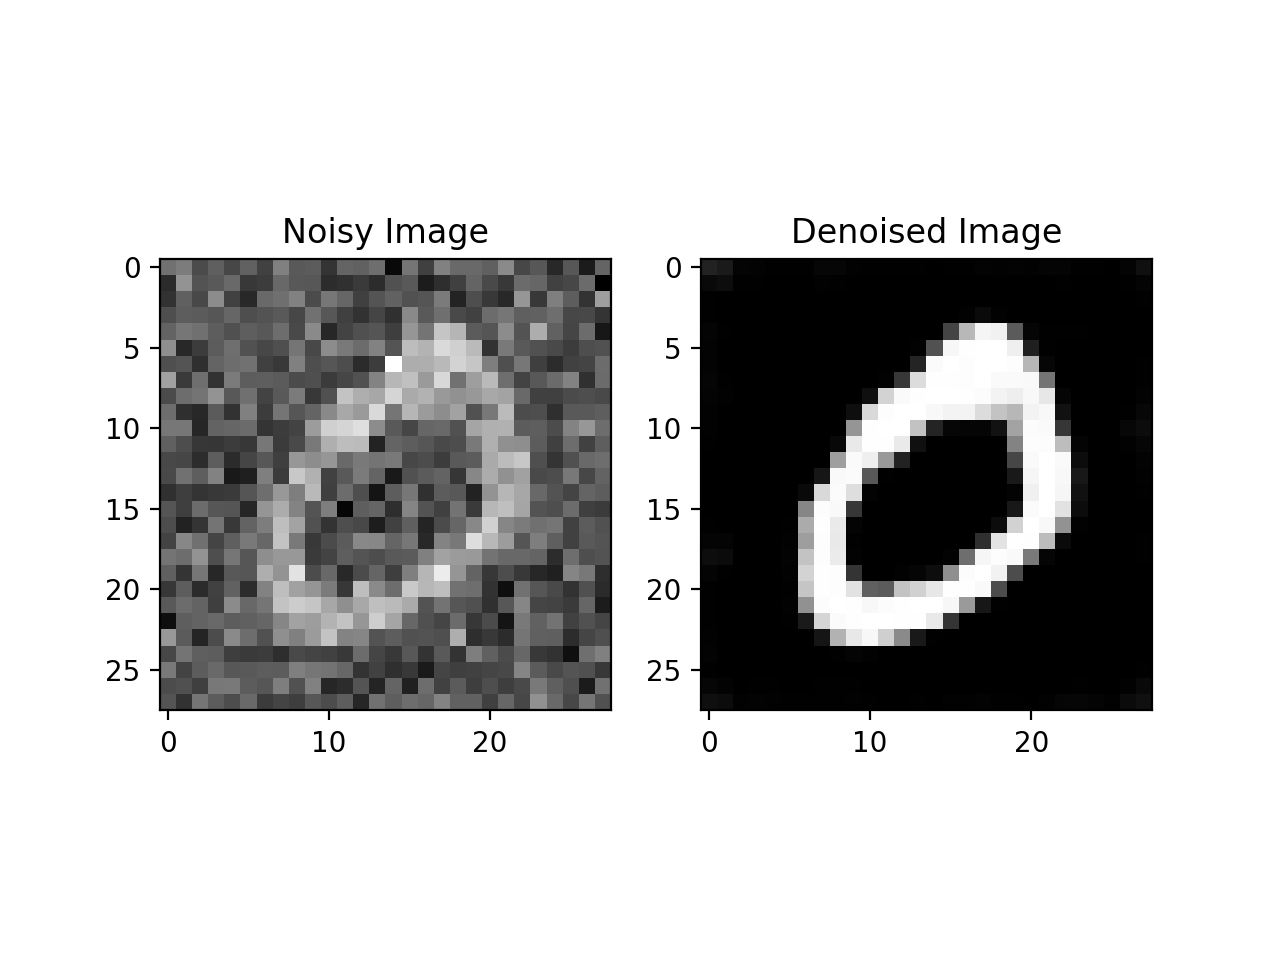

<IPython.core.display.Javascript object>


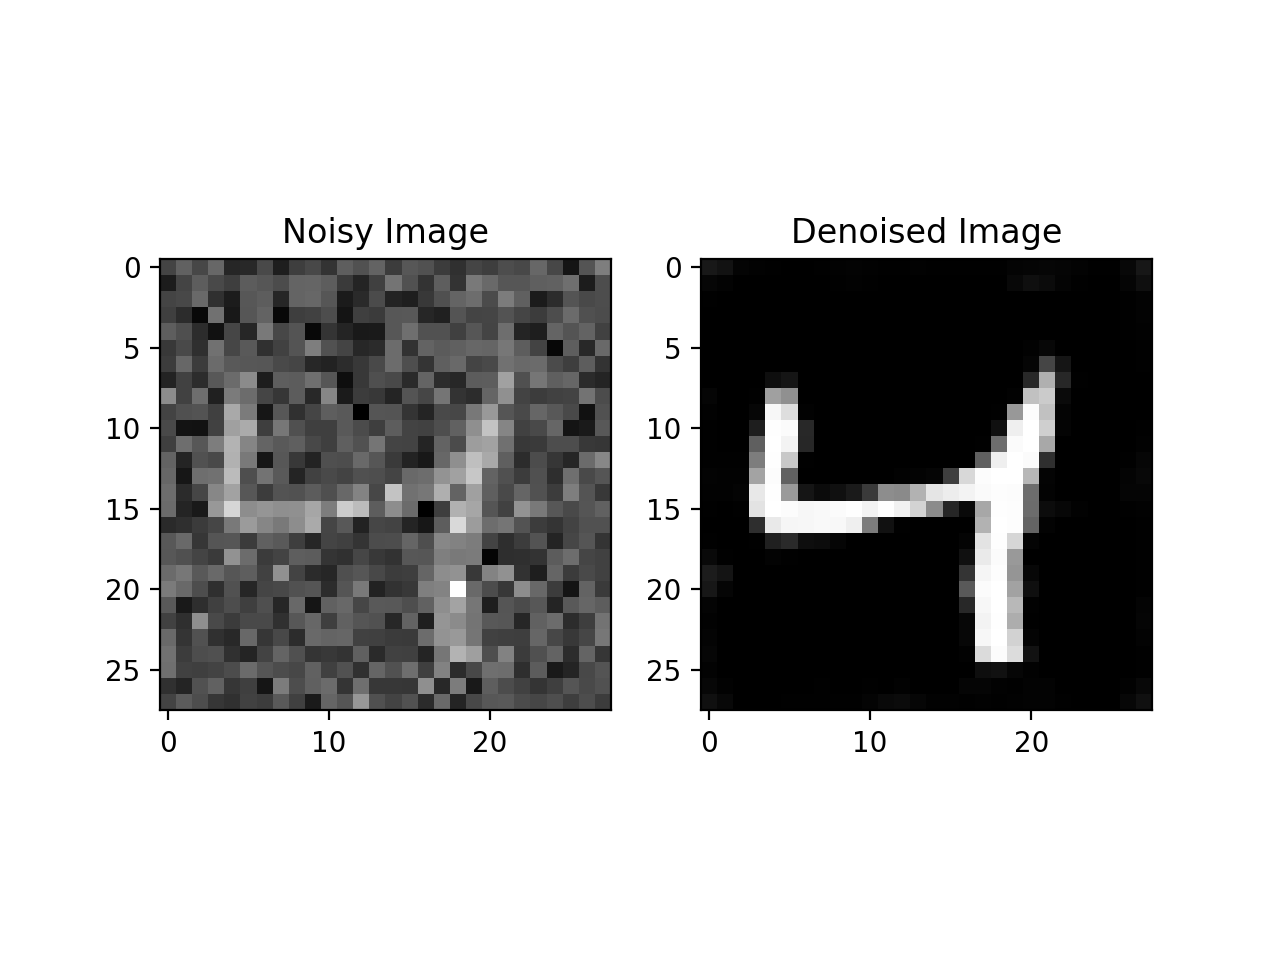

<IPython.core.display.Javascript object>


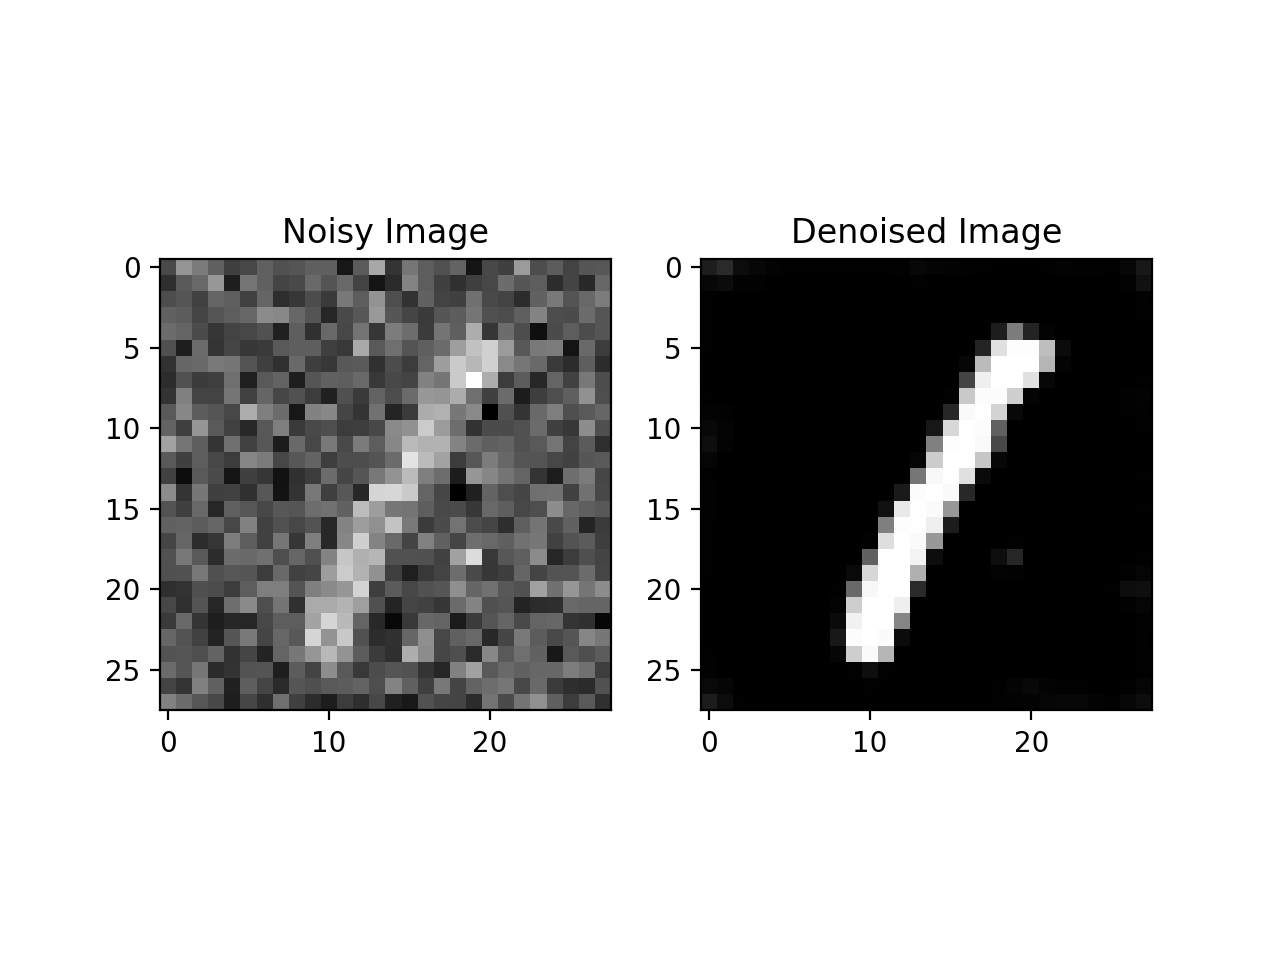

<IPython.core.display.Javascript object>


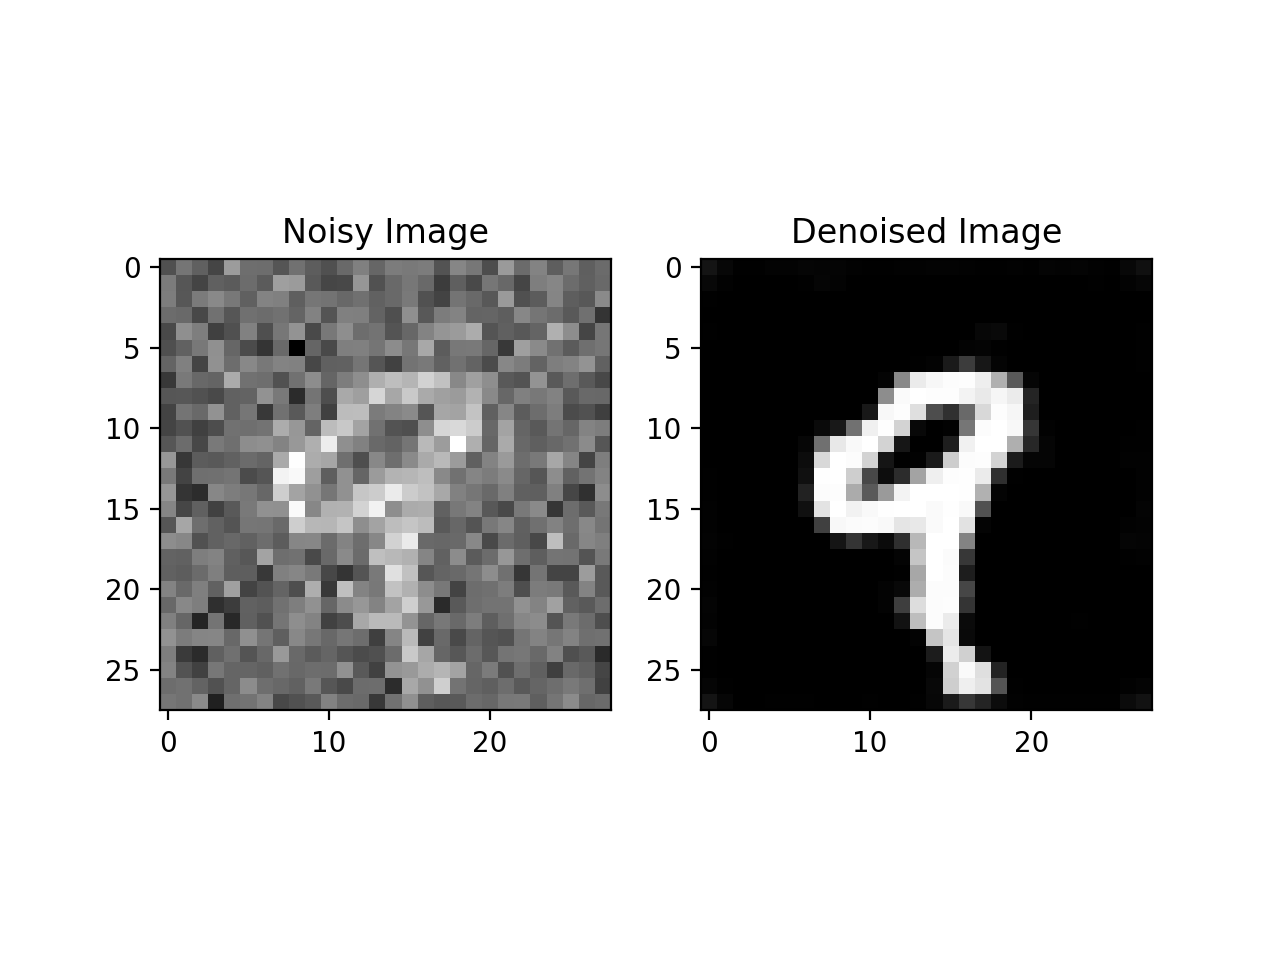

<IPython.core.display.Javascript object>


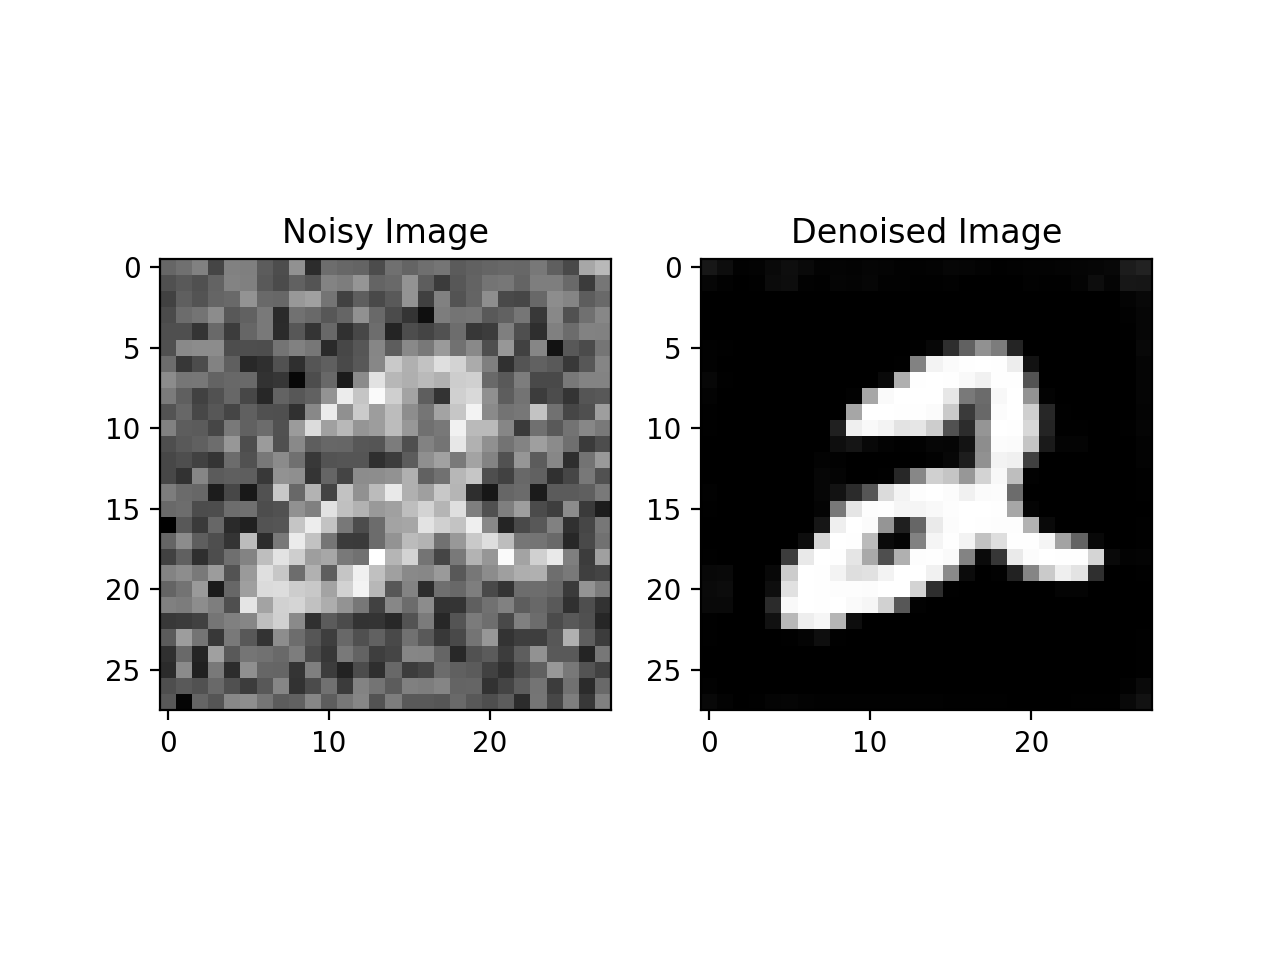

<IPython.core.display.Javascript object>


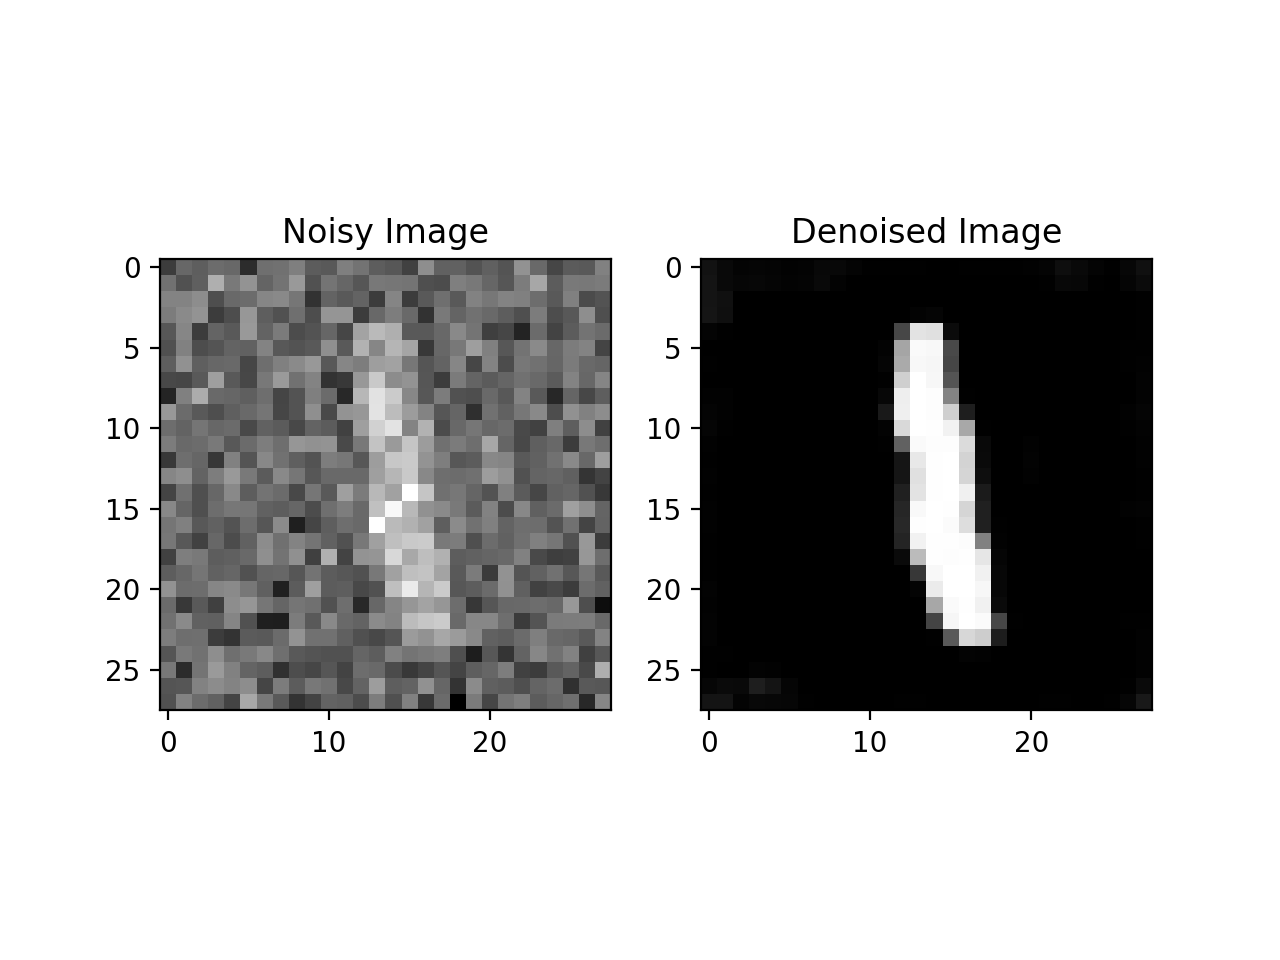

<IPython.core.display.Javascript object>


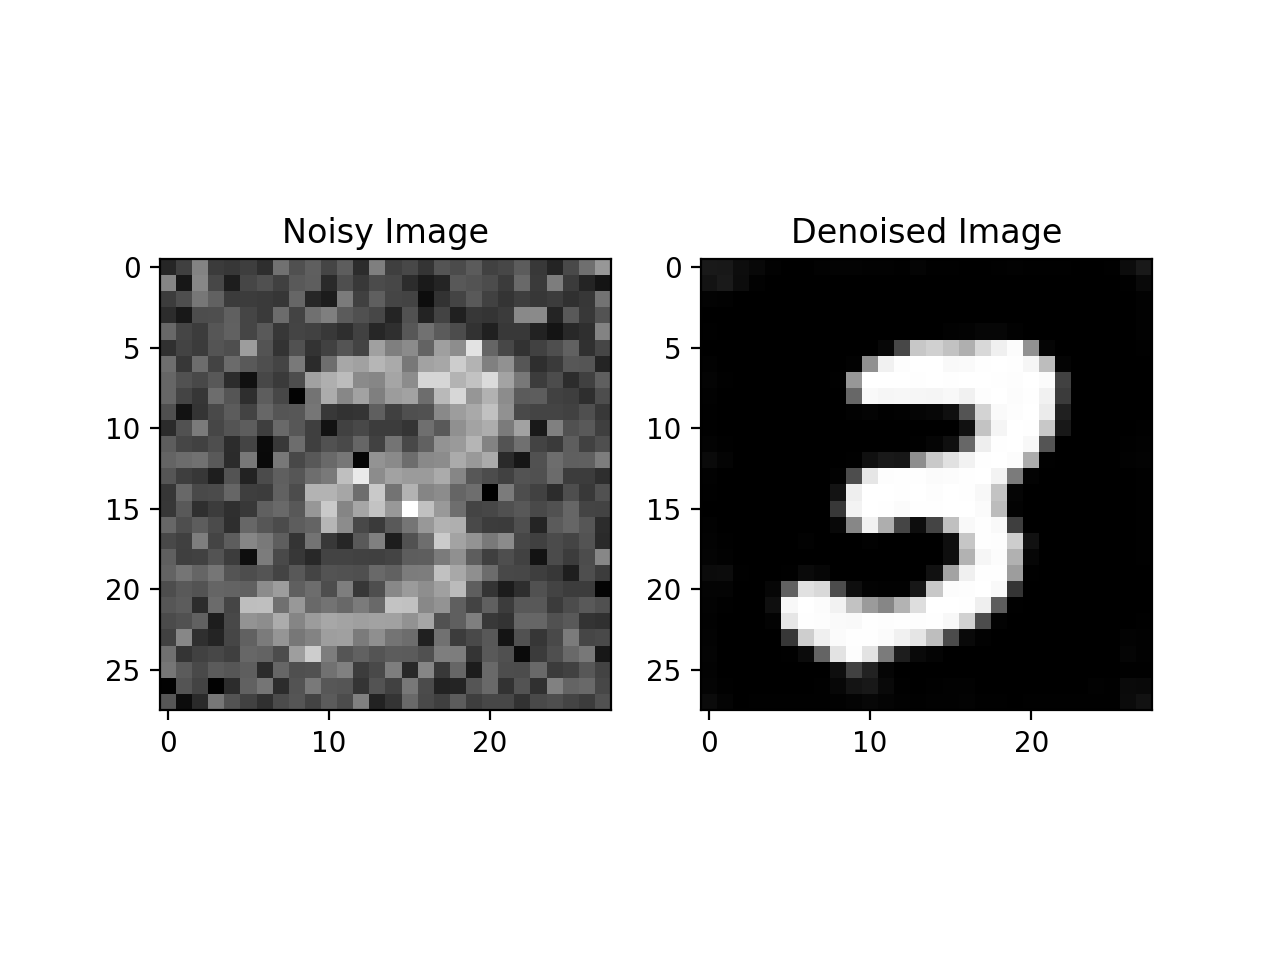

<IPython.core.display.Javascript object>


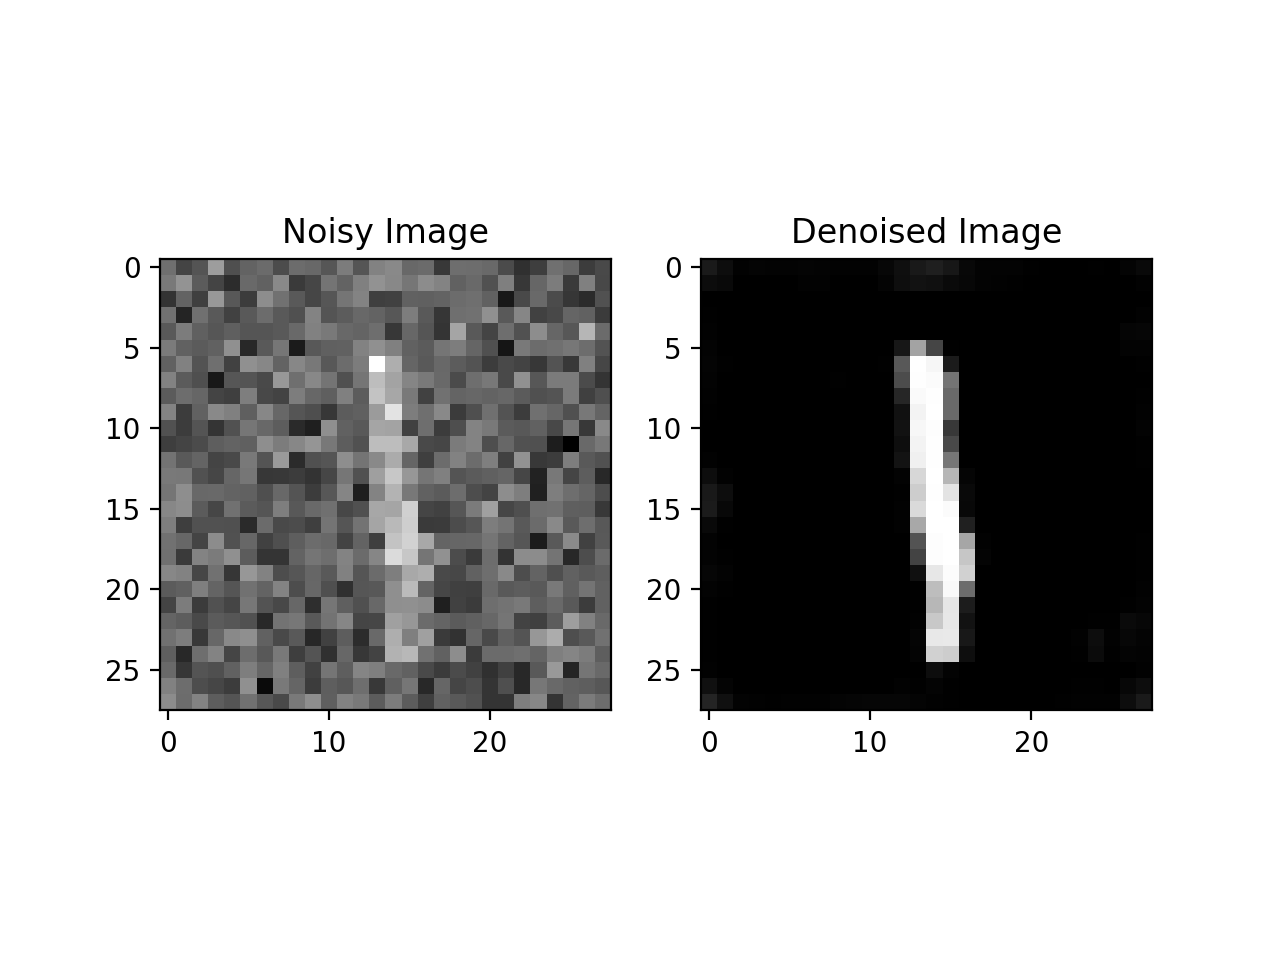

<IPython.core.display.Javascript object>


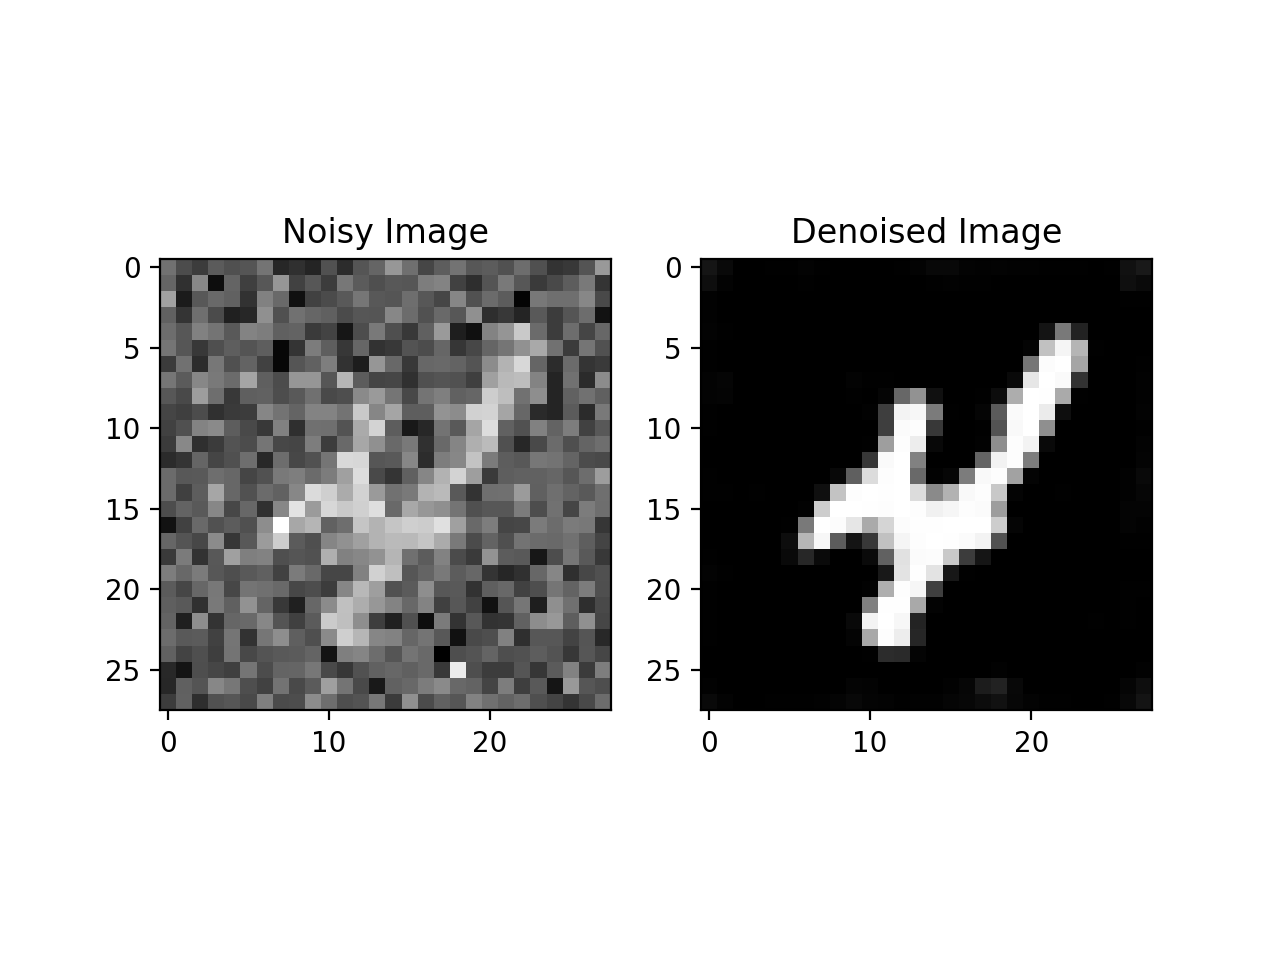

<IPython.core.display.Javascript object>


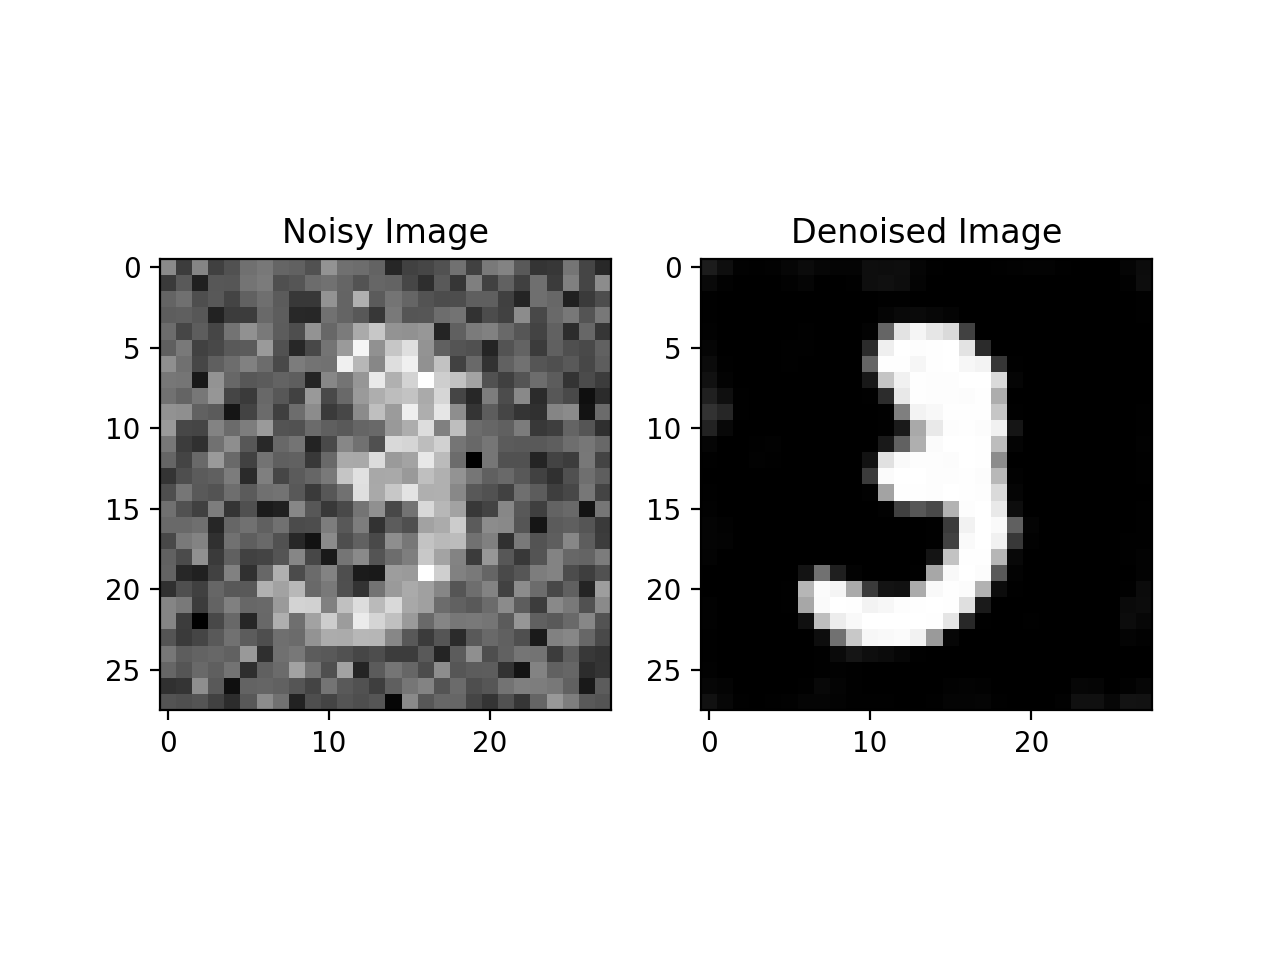

In [166]:
# Choose ten examples
examples = X_train_tensor[:10]

# Reshape into images to be passed through a CAE
examples = examples.view(examples.size(0), 1, 28, 28)

# Generate Gaussian noise
noise = torch.tensor(np.random.randn(examples.size(0), 784)).view(-1, 1, 28, 28).type(torch.FloatTensor)

# Add Gaussian noise to images
examples_noise = examples + 0.3 * noise

# Pass through CAE
predictions = ae(examples_noise)

predictions = predictions.view(-1, 28, 28)

for i in range(10):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(examples_noise[i].view(28, 28), cmap='gray')
    ax[0].set_title('Noisy Image')
    ax[1].imshow(predictions[i].detach().numpy(), cmap='gray')
    ax[1].set_title('Denoised Image')
    plt.show()
